# FLIPR HACKATHON 7.0 (Machine Learning)

Name : Sunny Bhandari

Email Address : sunnybhandari2019@gmail.com

In [1]:
# Imorting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_excel('Data.xlsx')
df.head()

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
1,AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
2,Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
3,Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [3]:
# shape of dataframe
df.shape

(100, 14)

In [4]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PLAYER     100 non-null    object 
 1   Mat        100 non-null    int64  
 2   Inns       100 non-null    int64  
 3   NO         100 non-null    int64  
 4   2018_Runs  100 non-null    int64  
 5   HS         100 non-null    object 
 6   Avg        100 non-null    object 
 7   BF         100 non-null    int64  
 8   SR         100 non-null    float64
 9   100        100 non-null    int64  
 10  50         100 non-null    int64  
 11  4s         100 non-null    int64  
 12  6s         100 non-null    int64  
 13  2019_Runs  100 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 11.1+ KB


In [5]:
# Checking null values
df.isnull().sum()

PLAYER       0
Mat          0
Inns         0
NO           0
2018_Runs    0
HS           0
Avg          0
BF           0
SR           0
100          0
50           0
4s           0
6s           0
2019_Runs    0
dtype: int64

Therefore, there is no null values in the dataset.

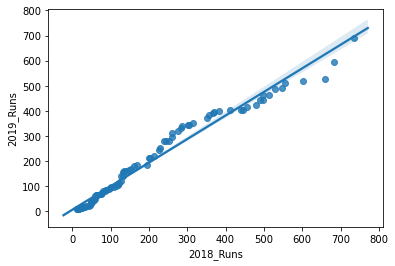

In [6]:
sns.regplot(x="2018_Runs", y="2019_Runs", data=df);

From the above plot we can clearly see that there is a linear relationship between the runs scored by player in 2018 and
the runs scored by player in 2019.

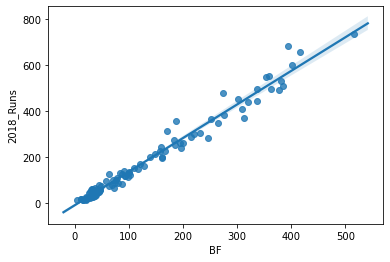

In [7]:
sns.regplot(x="BF", y="2018_Runs", data=df);

From the above plot we can clearly see that, the player who faces maximum balls scored more in IPL.

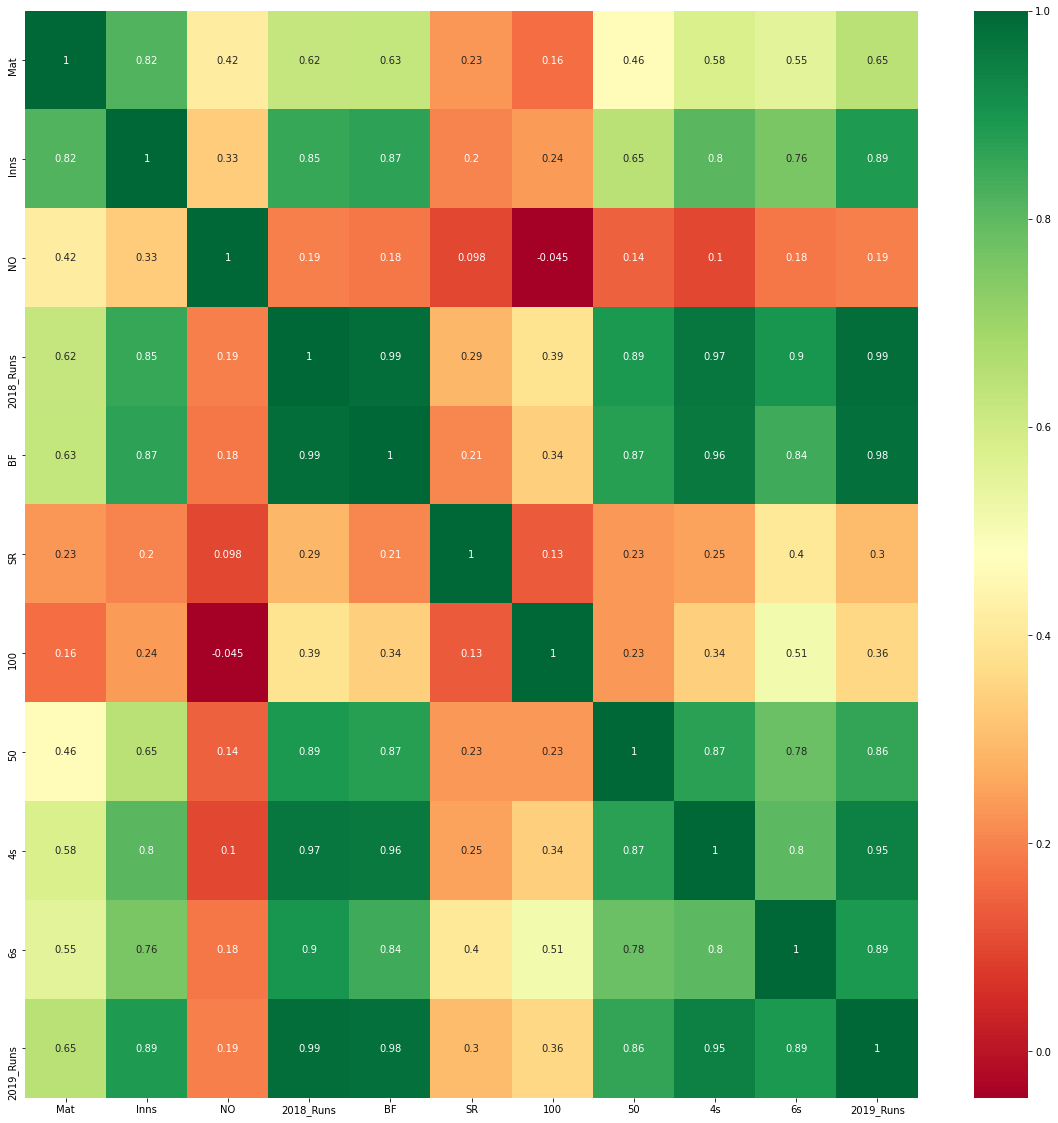

In [8]:
# Plot a heatmap to see how one feature is correlated with another feature
corrmat = df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
# plot heat map
g= sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
# Since player name has no use in predicting 2019 Runs, so drop it
df.drop('PLAYER',axis=1,inplace=True)

In [10]:
df.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
1,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
2,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
3,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
4,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [11]:
df.drop('HS',axis=1,inplace=True)

In [12]:
df.drop('Avg',axis=1,inplace=True)

In [13]:
df['SR'] = df['SR'].astype('int64')

In [14]:
df.head()

,Mat,Inns,NO,2018_Runs,BF,SR,100,50,4s,6s,2019_Runs
0,10,9,1,134,100,134,0,0,6,8,160
1,12,11,2,480,275,174,0,6,39,30,424
2,3,3,2,63,33,190,0,0,3,5,63
3,15,14,1,370,313,118,0,1,39,5,396
4,6,6,0,148,118,125,0,0,13,6,165


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Mat        100 non-null    int64
 1   Inns       100 non-null    int64
 2   NO         100 non-null    int64
 3   2018_Runs  100 non-null    int64
 4   BF         100 non-null    int64
 5   SR         100 non-null    int64
 6   100        100 non-null    int64
 7   50         100 non-null    int64
 8   4s         100 non-null    int64
 9   6s         100 non-null    int64
 10  2019_Runs  100 non-null    int64
dtypes: int64(11)
memory usage: 8.7 KB


In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, 10]

In [17]:
### Featires importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
print(model.feature_importances_)

[1.83917000e-03 2.00310201e-01 1.46049470e-03 3.82754280e-01
 1.12937051e-01 1.88158174e-03 2.43954367e-05 2.08638177e-03
 2.24477228e-01 7.22292164e-02]


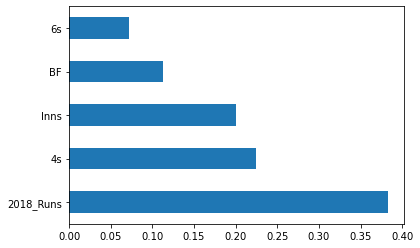

In [19]:
# plot graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh') # taking top 5 largest importance features
plt.show()

From above graph we can clearly see that 2018 Runs are most important features in predicting 2019_Runs and after that no. of balls faced.

In [20]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [21]:
X_train.shape

(80, 10)

In [22]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [23]:
### Hyperparameters Tuning
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [26]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [28]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [29]:
# Training our model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [30]:
# Predicting on our test set
predictions=rf_random.predict(X_test)

In [31]:
predictions

array([ 18.301, 424.856,  12.655,  18.892, 459.685, 523.958, 263.999,
        38.557,  57.598,  96.357, 155.502, 459.596, 213.538,  19.754,
        23.014, 259.539, 327.207, 211.032, 343.82 ,  79.278])

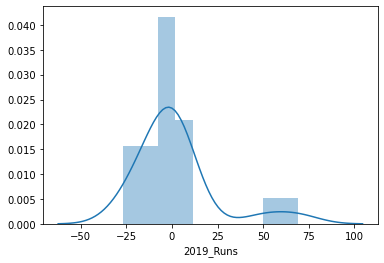

In [32]:
sns.distplot(y_test-predictions)

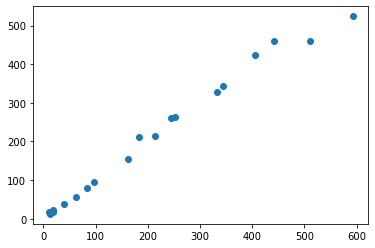

In [33]:
plt.scatter(y_test,predictions)

In [34]:
# Checking accuracy of our model.
errors = abs(predictions - y_test)

In [35]:
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape

In [36]:
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.73 %.


Therefore, accuracy of our model is 89.73% which is good !!

# Now doing Predictions on test dataset

In [37]:
# Loading test dataset
df2 = pd.read_excel('Data.xlsx', sheet_name="Test_Data")

In [38]:
df2.head()

,PLAYER,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s
0,David Warner,12,12,2,692,100*,69.2,481,143.86,1,8,57,21
1,KL Rahul,14,14,3,593,100*,53.9,438,135.38,1,6,49,25
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25
3,Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11
4,Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52


In [39]:
# Checking for null values
df2.isnull().sum()

PLAYER       0
Mat          0
Inns         0
NO           0
2019_Runs    0
HS           0
Avg          0
BF           0
SR           0
100          0
50           0
4s           0
6s           0
dtype: int64

In [40]:
# Dropping columns which are useless in predicting 2020 Runs
df2.drop('PLAYER',axis=1,inplace=True)

In [41]:
df2.drop('HS',axis=1,inplace=True)

In [42]:
df2.drop('Avg',axis=1,inplace=True)

In [43]:
df2['SR'] = df2['SR'].astype('int64')

In [44]:
df2.head()

,Mat,Inns,NO,2019_Runs,BF,SR,100,50,4s,6s
0,12,12,2,692,481,143,1,8,57,21
1,14,14,3,593,438,135,1,6,49,25
2,16,16,1,529,398,132,0,4,45,25
3,16,16,1,521,384,135,0,5,64,11
4,14,13,4,510,249,204,0,4,31,52


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Mat        100 non-null    int64
 1   Inns       100 non-null    int64
 2   NO         100 non-null    int64
 3   2019_Runs  100 non-null    int64
 4   BF         100 non-null    int64
 5   SR         100 non-null    int64
 6   100        100 non-null    int64
 7   50         100 non-null    int64
 8   4s         100 non-null    int64
 9   6s         100 non-null    int64
dtypes: int64(10)
memory usage: 7.9 KB


In [46]:
# Predictions on our test dataset
predictions2 = rf_random.predict(df2)

In [47]:
predictions2

array([534.21 , 495.019, 472.666, 466.822, 432.383, 448.92 , 421.761,
       420.345, 420.857, 401.527, 412.334, 396.316, 388.017, 404.17 ,
       401.699, 377.02 , 428.353, 393.096, 380.478, 417.173, 395.681,
       380.093, 359.421, 371.755, 344.821, 353.418, 335.558, 338.53 ,
       325.832, 337.263, 319.33 , 320.491, 315.129, 285.977, 221.607,
       218.045, 213.892, 198.739, 209.177, 175.919, 181.96 , 165.336,
       218.08 , 165.505, 161.774, 158.831, 150.193, 113.067, 104.45 ,
       119.326, 104.739, 100.023,  87.762,  92.313,  99.809,  84.215,
        83.995,  82.01 ,  73.514,  81.461,  74.69 ,  68.126,  61.033,
        61.069,  65.102,  60.54 ,  59.559,  59.743,  34.477,  34.422,
        27.096,  30.398,  25.667,  25.849,  20.296,  27.904,  22.133,
        20.079,  18.199,  19.968,  13.028,  17.439,  12.634,  14.712,
        12.832,  12.843,  12.547,  13.847,  15.034,  17.502,  12.147,
        12.243,  14.354,  12.958,  10.649,  11.844,  18.632,  11.554,
        10.781,  11.

In [48]:
# Adding above prediction in new column in our dataframe
df2['2020_Runs'] = predictions2

In [49]:
df2 = pd.read_excel('Data.xlsx', sheet_name="Test_Data")

In [50]:
df2.head()

,PLAYER,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s
0,David Warner,12,12,2,692,100*,69.2,481,143.86,1,8,57,21
1,KL Rahul,14,14,3,593,100*,53.9,438,135.38,1,6,49,25
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25
3,Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11
4,Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52


In [51]:
df2.drop(df2.iloc[:, 1:], inplace = True, axis = 1) 

In [52]:
df2['2020_Runs'] = predictions2

In [53]:
df2.head()

,PLAYER,2020_Runs
0,David Warner,534.210
1,KL Rahul,495.019
2,Quinton de Kock,472.666
3,Shikhar Dhawan,466.822
4,Andre Russell,432.383


In [54]:
df2['2020_Runs'] = df2['2020_Runs'].astype('int64')

In [55]:
df2.head()

,PLAYER,2020_Runs
0,David Warner,534
1,KL Rahul,495
2,Quinton de Kock,472
3,Shikhar Dhawan,466
4,Andre Russell,432


In [57]:
df2.to_excel("final_submission.xlsx") 